In [496]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt

## Dataset I

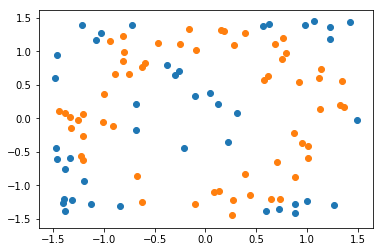

In [567]:
n = 100
# input
x = 3 * (np.random.rand(n, 2) - 0.5)

radius = np.square(x[:, 0]) + np.square(x[:, 1])
radius = np.reshape(radius, (n, 1))
y = (radius > 0.7 + 0.1 * np.random.randn(n, 1)) & (radius < 2.2 + 0.1 * np.random.randn(n, 1))
y = np.reshape(y, (n,))
x_true = x[np.where(y == True)]
x_false = x[np.where(y == False)]

# label
y = 2 * y - 1

plt.scatter(x_false[:, 1], x_false[:, 0])
plt.scatter(x_true[:, 0], x_true[:, 1])
plt.show()

## Dataset II

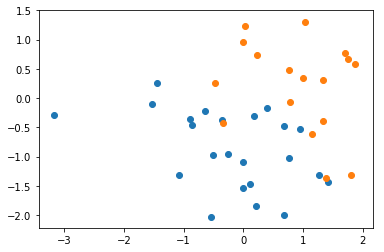

In [569]:
n = 40
omega = np.random.randn(1,)
noise = 0.8 * np.random.randn(n,)
# input
x = np.random.randn(n, 2)
y = omega * x[:, 0] + x[:, 1] + noise > 0

x_true = x[np.where((y==True))]
x_false = x[np.where((y==False))]

# label
y = 2 * y - 1

plt.scatter(x_false[:, 1], x_false[:, 0])
plt.scatter(x_true[:, 0], x_true[:, 1])
plt.show()

## 基底クラス

In [582]:
class Sigmoid:
    def __init__(self, dim, lr, lam):
        # 重みの初期化は下記のいずれか(損失の変化が比較できるので，今回はゼロで初期化)
        # self.weight = np.random.randn(dim)
        self.weight = np.zeros(dim)
        self.lr = lr
        self.lam = lam
        self.loss_history = np.zeros(0)

    def sigmoid(self, x, y):
        return 1 / (1 + np.exp(-y * np.dot(self.weight, x)))

    def grad(self, x, y):
        return (self.sigmoid(x, y) - 1.0) * y * x

    def hessian(self, x, y):
        _x = np.array([x])
        _x_t = _x.transpose()
        p = self.sigmoid(x, y)
        # 本当はy^2も掛ける必要があるが，今回の場合は1 or -1なので省略
        return p * (1 - p) * _x * _x_t
    
    def predict(self, x, y):
        return np.log(self.sigmoid(x, y)**-1) + self.lam * np.linalg.norm(x)
    
    def classifier(self, x):
        return 1 if np.dot(self.weight, x) > 0 else -1

## 最急降下法

In [596]:
class GradientMethod(Sigmoid):
    def __init__(self, dim=2, lr=0.1, lam=0.001):
        super(GradientMethod, self).__init__(dim, lr, lam)

    def train(self, x, y, epochs=10):
        self.loss_history = np.zeros(epochs)
        for epoch in range(epochs):
            _grad = np.zeros(2)
            _loss = 0.0
            for i in range(len(x)):
                _grad += self.grad(x[i], y[i])
                _loss += self.predict(x[i], y[i])
            _grad = _grad / len(x) + 2 * self.lam * self.weight 
            self.weight -= self.lr * _grad

            _loss = _loss / len(x)
            self.loss_history[epoch] = _loss            
            print("loss = {}".format(_loss)) 

In [597]:
gm = GradientMethod()
gm.train(x, y, 50)

loss = 0.6944835449342605
loss = 0.6742860357587834
loss = 0.6553000788497406
loss = 0.6374489534054493
loss = 0.6206588132461444
loss = 0.6048591108632231
loss = 0.5899828811634084
loss = 0.5759669056540855
loss = 0.5627517778777744
loss = 0.550281889780601
loss = 0.5385053568350424
loss = 0.5273738974883434
loss = 0.5168426801411871
loss = 0.5068701485600005
loss = 0.49741783450522475
loss = 0.48845016447853873
loss = 0.4799342658777409
loss = 0.47183977649653375
loss = 0.46413866019985867
loss = 0.4568050307174242
loss = 0.44981498479888665
loss = 0.44314644543410814
loss = 0.4367790154331475
loss = 0.43069384135822275
loss = 0.4248734875823096
loss = 0.4193018200980318
loss = 0.41396389960108604
loss = 0.4088458833122629
loss = 0.40393493497145744
loss = 0.399219142427999
loss = 0.39468744225818686
loss = 0.390329550858284
loss = 0.3861359014858572
loss = 0.38209758675150207
loss = 0.37820630609463335
loss = 0.3744543178096778
loss = 0.37083439522160827
loss = 0.3673397866415568
lo

In [598]:
class NewtonMethod(Sigmoid):
    def __init__(self, dim=2, lr=0.1, lam=0.001):
        super(NewtonMethod, self).__init__(dim, lr, lam)
        self.dim = dim
            
    def train(self, x, y, epochs=10):
        self.loss_history = np.zeros(epochs)
        for epoch in range(epochs):
            _grad = np.zeros(2)
            _hesse = np.zeros((2,2))
            _loss = 0.0
            for i in range(len(x)):
                _grad += self.grad(x[i], y[i])
                _hesse += self.hessian(x[i], y[i])
                _loss += self.predict(x[i], y[i])
            _grad = _grad / len(x) + 2 * self.lam * self.weight
            _hesse = _hesse / len(x) + 2 * self.lam * np.identity(self.dim)
            self.weight -= (self.lr * np.matrix(_grad) * np.linalg.inv(_hesse)).A1

            _loss = _loss / len(x)
            self.loss_history[epoch] = _loss            
            print("loss = {}".format(_loss)) 

In [599]:
nm = NewtonMethod()
nm.train(x, y, 50)

loss = 0.6944835449342605
loss = 0.629985886617829
loss = 0.5769339733541332
loss = 0.532249329138815
loss = 0.4939487465337441
loss = 0.4606833422834396
loss = 0.43149590019484485
loss = 0.4056833963223892
loss = 0.3827145174577943
loss = 0.362177832189719
loss = 0.34374795170291733
loss = 0.32716270673394365
loss = 0.3122073152767305
loss = 0.29870312454157344
loss = 0.2864994283441498
loss = 0.2754674047099947
loss = 0.265495550945991
loss = 0.25648620203298034
loss = 0.24835285153299563
loss = 0.2410180804134451
loss = 0.2344119552408686
loss = 0.22847079377328972
loss = 0.22313622006152686
loss = 0.2183544474085192
loss = 0.2140757390175362
loss = 0.2102540048606149
loss = 0.20684650039844055
loss = 0.20381359891459355
loss = 0.20111861467481518
loss = 0.19872765897713715
loss = 0.19660951542947974
loss = 0.19473552446866133
loss = 0.19307947022397515
loss = 0.1916174653570189
loss = 0.19032783152225224
loss = 0.18919097464390805
loss = 0.18818925535051254
loss = 0.187306855702739

## 確認用
学習データをそのままpredictしているので，汎化性を確認するものでないことに注意

あくまで，学習データにフィットしているか確認するもの

In [600]:
def train_data_accuracy(model, x, y, debug=False):
    count = 0
    for i in range(len(x)):
        if debug:
            print(model.classifier(x[i]), y[i])
        count = count + 1 if model.classifier(x[i]) == y[i] else count
    print(count / len(x))
    
train_data_accuracy(gm, x, y)
train_data_accuracy(nm, x, y)

0.95
0.95


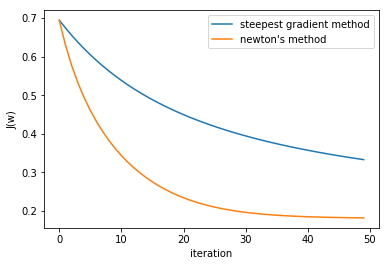

In [612]:
x_axis = np.arange(50)
plt.xlabel("iteration")
plt.ylabel("J(w)")
plt.plot(x_axis, gm.loss_history, label="steepest gradient method")
plt.plot(x_axis, nm.loss_history, label="newton's method")
plt.legend()
plt.show()